In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
data_path = r"/Users/mayankchandnani/Desktop/653 Project/82373-191501-bundle-archive/"

In [3]:
def load_data(dataset):
    images = []
    classes = []
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(data_path, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
#         if i % 500 == 0:
#             print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)
    X = np.array(images)
    y = np.array(classes)

    return (X, y)

In [16]:
epochs = 25
learning_rate = 0.001
batch_size = 64

In [5]:
train_data = r"/Users/mayankchandnani/Desktop/653 Project/82373-191501-bundle-archive/Train.csv"
test_data = r"/Users/mayankchandnani/Desktop/653 Project/82373-191501-bundle-archive/Test.csv"
(trainX, trainY) = load_data(train_data)
(testX, testY) = load_data(test_data)

(32, 32, 3)


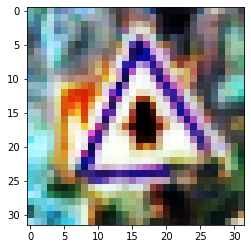

In [6]:
# print(trainX[0])
plt.figure()
plt.imshow(trainX[0]) # To change [-1, 1] to [0,1]
print(trainX[0].shape)
plt.show()

In [7]:
print(trainY[0])
# plt.figure()
# plt.imshow(trainY[0]) # To change [-1, 1] to [0,1]
# print(trainY[0].shape)
# plt.show()

11


In [8]:
print("UPDATE: Normalizing data")
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0


UPDATE: Normalizing data


In [9]:
print("UPDATE: One-Hot Encoding data")
num_labels = len(np.unique(trainY))
print(num_labels)
testY = to_categorical(testY, 43)
print(testY[0])
trainY = to_categorical(trainY, 43)
print(trainY[0])

# class_totals = trainY.sum(axis=0)
# print(class_totals)
# class_weight = class_totals.max() / class_totals

UPDATE: One-Hot Encoding data
43
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(32, 32, 3)


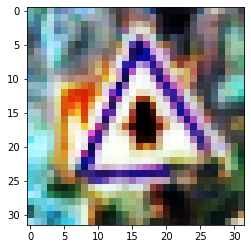

In [10]:
# print(trainX[0])
plt.figure()
plt.imshow(trainX[0]) # To change [-1, 1] to [0,1]
print(trainX[0].shape)
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [12]:
class RoadSignClassifier:
    def createCNN(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(8, (5, 5), input_shape=inputShape,activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation="relu"))
        model.add(Dense(classes, activation="softmax"))
        return model

In [13]:
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)

In [17]:
model = RoadSignClassifier.createCNN(width=32, height=32, depth=3, classes=43)
optimizer = Adam(lr=learning_rate, decay=learning_rate / (epochs))

In [18]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
fit = model.fit_generator(
    data_aug.flow(trainX, trainY, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(testX, testY),
    verbose=1)


Epoch 1/25
613/613 [==============================] - 320s 522ms/step - loss: 1.4023 - accuracy: 0.5890 - val_loss: 0.6634 - val_accuracy: 0.7950
Epoch 2/25
613/613 [==============================] - 316s 516ms/step - loss: 0.5793 - accuracy: 0.8136 - val_loss: 0.5010 - val_accuracy: 0.8410
Epoch 3/25
613/613 [==============================] - 319s 521ms/step - loss: 0.3725 - accuracy: 0.8804 - val_loss: 0.2843 - val_accuracy: 0.9118
Epoch 4/25
613/613 [==============================] - 315s 514ms/step - loss: 0.2779 - accuracy: 0.9092 - val_loss: 0.2601 - val_accuracy: 0.9226
Epoch 5/25
613/613 [==============================] - 311s 507ms/step - loss: 0.2283 - accuracy: 0.9262 - val_loss: 0.2123 - val_accuracy: 0.9375
Epoch 6/25
613/613 [==============================] - 306s 500ms/step - loss: 0.1899 - accuracy: 0.9375 - val_loss: 0.3100 - val_accuracy: 0.9133
Epoch 7/25
613/613 [==============================] - 312s 508ms/step - loss: 0.1731 - accuracy: 0.9432 - val_loss: 0.1890 -

In [19]:
model.save('loss_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: loss_model/assets


In [20]:
model.save('noLoss_model.h5')